In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [330]:

links = pd.read_csv("/Users/hi/Desktop/data_science_wbs_school/Recommender_system/project/c1ba2d8cbaa22297e5d9b0b7a17fcb7awbsflix-dataset/ml-latest-small/links.csv")
movies = pd.read_csv("/Users/hi/Desktop/data_science_wbs_school/Recommender_system/project/c1ba2d8cbaa22297e5d9b0b7a17fcb7awbsflix-dataset/ml-latest-small/movies.csv")
ratings = pd.read_csv("/Users/hi/Desktop/data_science_wbs_school/Recommender_system/project/c1ba2d8cbaa22297e5d9b0b7a17fcb7awbsflix-dataset/ml-latest-small/ratings.csv")
tags = pd.read_csv("/Users/hi/Desktop/data_science_wbs_school/Recommender_system/project/c1ba2d8cbaa22297e5d9b0b7a17fcb7awbsflix-dataset/ml-latest-small/tags.csv")

# Exploratory Data Analysis

In [242]:
links.head(1)

,movieId,imdbId,tmdbId
0,1,114709,862.0


In [243]:
movies.head(1)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [244]:
ratings.head(1)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703


In [245]:
tags.head(1)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994


In [246]:
print(links.info())
print(movies.info())
print(ratings.info())
print(tags.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 no

# Top 10 picks of our customers
Movie recommendation based on the popularity (rating_count)

In [247]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


Let's group movies by rating, and look at their average rating. This is an explicit rating given by users.

In [248]:
# movies based on highest ratings
rating_avg = pd.DataFrame(ratings.groupby('movieId')['rating'].mean())
rating_avg['overall_rating'] = round((ratings.groupby('movieId')['rating'].mean()))
rating_avg  = rating_avg.sort_values("rating", ascending=False)#.reset_index()
rating_avg 

,rating,overall_rating
movieId,,
88448,5.0,5.0
100556,5.0,5.0
143031,5.0,5.0
143511,5.0,5.0
143559,5.0,5.0
...,...,...
157172,0.5,0.0
85334,0.5,0.0
53453,0.5,0.0


Number of ratings: a movie that has been rated many times is “popular” —it has been watched/rated by a lot of people, regardless of whether they liked it or not.

In [249]:
# movies based on no.of times rated
rating_count = pd.DataFrame(ratings.groupby('movieId')['rating'].count())
rating_count = rating_count.sort_values("rating", ascending=False)#.reset_index()

rating_count

,rating
movieId,
356,329
318,317
296,307
593,279
2571,278
...,...
4093,1
4089,1
58351,1


In [250]:
# merging both the data frames
rating_final  = rating_avg.merge(rating_count, on = 'movieId')
rating_final.rename(columns = {'rating_x':'rating_avg', 'rating_y':'rating_count'}, inplace = True)

rating_final = rating_final.sort_values("rating_count", ascending=False)
rating_final 

,rating_avg,overall_rating,rating_count
movieId,,,
356,4.164134,4.0,329
318,4.429022,4.0,317
296,4.197068,4.0,307
593,4.161290,4.0,279
2571,4.192446,4.0,278
...,...,...,...
2697,3.500000,4.0,1
90243,3.500000,4.0,1
115667,3.500000,4.0,1


In [251]:
rating_final = rating_final[rating_final['rating_count']>=100].merge(movies, on = "movieId")
rating_final

,movieId,rating_avg,overall_rating,rating_count,title,genres
0,356,4.164134,4.0,329,Forrest Gump (1994),Comedy|Drama|Romance|War
1,318,4.429022,4.0,317,"Shawshank Redemption, The (1994)",Crime|Drama
2,296,4.197068,4.0,307,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,593,4.161290,4.0,279,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
4,2571,4.192446,4.0,278,"Matrix, The (1999)",Action|Sci-Fi|Thriller
...,...,...,...,...,...,...
133,454,3.534653,4.0,101,"Firm, The (1993)",Drama|Thriller
134,912,4.240000,4.0,100,Casablanca (1942),Drama|Romance
135,4022,3.700000,4.0,100,Cast Away (2000),Drama
136,1517,3.535000,4.0,100,Austin Powers: International Man of Mystery (1...,Action|Adventure|Comedy


# 1. Top 10 popular movies by highest rating and most rated

In [252]:
# creating function for the popular movies based on hybrid 

def popular_movies (movie_count):
  
  rating_avg = pd.DataFrame(ratings.groupby('movieId')['rating'].mean())
  rating_avg['overall_rating'] = round((ratings.groupby('movieId')['rating'].mean()))
  rating_count = pd.DataFrame(ratings.groupby('movieId')['rating'].count())
  rating_final  = rating_avg.merge(rating_count, on = 'movieId').merge(movies, on = "movieId")
  rating_final.rename(columns = {'rating_x':'rating_avg', 'rating_y':'rating_count'}, inplace = True)
  rating_final = rating_final[rating_final['rating_count']>=100].sort_values("rating_count", ascending=False)
  rating_final = rating_final.drop_duplicates(["title"])
  top_movies = rating_final.head(movie_count)


  return(top_movies)


# Preparing dataframe for streamlit

In [253]:
popular_all = popular_movies(20) #naming the dataframe for pickle

In [254]:
popular_all.rename(columns = {'movieId':'Movie Id', 'rating_avg':'Avg. Rating', 'title':'Movie Title'}, inplace = True)


#popular_all =popular_all.drop(["overall_rating", "genres", "rating_count"], axis=1)
popular_all["Avg. Rating"] = round(popular_all["Avg. Rating"], 1)

popular_all["Year"]= popular_all["Movie Title"].str.findall("\d{4}")
popular_all["Movie Title"]= popular_all["Movie Title"].str.replace('(\(\d{4})\)', '')


C:\Users\hi\AppData\Local\Temp\ipykernel_17080\953445925.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  popular_all["Movie Title"]= popular_all["Movie Title"].str.replace('(\(\d{4})\)', '')


In [255]:
popular_all = popular_all.set_index("Movie Id")

In [256]:
popular_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 356 to 4993
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Avg. Rating     20 non-null     float64
 1   overall_rating  20 non-null     float64
 2   rating_count    20 non-null     int64  
 3   Movie Title     20 non-null     object 
 4   genres          20 non-null     object 
 5   Year            20 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 1.1+ KB


In [257]:
popular_all

,Avg. Rating,overall_rating,rating_count,Movie Title,genres,Year
Movie Id,,,,,,
356,4.2,4.0,329,Forrest Gump,Comedy|Drama|Romance|War,[1994]
318,4.4,4.0,317,"Shawshank Redemption, The",Crime|Drama,[1994]
296,4.2,4.0,307,Pulp Fiction,Comedy|Crime|Drama|Thriller,[1994]
593,4.2,4.0,279,"Silence of the Lambs, The",Crime|Horror|Thriller,[1991]
2571,4.2,4.0,278,"Matrix, The",Action|Sci-Fi|Thriller,[1999]
260,4.2,4.0,251,Star Wars: Episode IV - A New Hope,Action|Adventure|Sci-Fi,[1977]
480,3.8,4.0,238,Jurassic Park,Action|Adventure|Sci-Fi|Thriller,[1993]
110,4.0,4.0,237,Braveheart,Action|Drama|War,[1995]
589,4.0,4.0,224,Terminator 2: Judgment Day,Action|Sci-Fi,[1991]


In [258]:
import pickle

pickle.dump(popular_all, open('popular_all.pkl', 'wb'))

# 2. More movies like "......." for you:
Using item based collaborative filtering 

Preparing Data For Correlation

In [259]:
rating_final1 = rating_final.merge(ratings, on =["movieId"])

In [260]:
rating_final1

,movieId,rating_avg,overall_rating,rating_count,title,genres,userId,rating,timestamp
0,356,4.164134,4.0,329,Forrest Gump (1994),Comedy|Drama|Romance|War,1,4.0,964980962
1,356,4.164134,4.0,329,Forrest Gump (1994),Comedy|Drama|Romance|War,6,5.0,845553200
2,356,4.164134,4.0,329,Forrest Gump (1994),Comedy|Drama|Romance|War,7,5.0,1106635915
3,356,4.164134,4.0,329,Forrest Gump (1994),Comedy|Drama|Romance|War,8,3.0,839463527
4,356,4.164134,4.0,329,Forrest Gump (1994),Comedy|Drama|Romance|War,10,3.5,1455301685
...,...,...,...,...,...,...,...,...,...
20183,44191,3.885000,4.0,100,V for Vendetta (2006),Action|Sci-Fi|Thriller|IMAX,599,3.5,1498542540
20184,44191,3.885000,4.0,100,V for Vendetta (2006),Action|Sci-Fi|Thriller|IMAX,600,0.5,1237760968
20185,44191,3.885000,4.0,100,V for Vendetta (2006),Action|Sci-Fi|Thriller|IMAX,601,4.0,1521467758
20186,44191,3.885000,4.0,100,V for Vendetta (2006),Action|Sci-Fi|Thriller|IMAX,608,4.0,1147964276


In [261]:
# pivoting for correlation
movie_rating_tab= pd.pivot_table(data=rating_final1, values='rating', index='userId', columns='title')
movie_rating_tab.head(10)

title,2001: A Space Odyssey (1968),Ace Ventura: Pet Detective (1994),Aladdin (1992),Alien (1979),Aliens (1986),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),Apocalypse Now (1979),...,"Truman Show, The (1998)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),Up (2009),"Usual Suspects, The (1995)",V for Vendetta (2006),WALL·E (2008),Waterworld (1995),Willy Wonka & the Chocolate Factory (1971),X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,3.0,NaN,5.0,NaN,NaN,NaN,5.0,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
5,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
6,NaN,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,5.0,NaN,1.0,NaN,NaN,3.0,3.0,NaN
7,4.0,NaN,3.0,NaN,NaN,NaN,4.0,NaN,NaN,4.0,...,3.0,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,3.5
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,5.0,NaN,NaN,3.0,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [262]:
movie_rating_tab = movie_rating_tab.fillna(0)

In [263]:
# checking the movies similarities with movie 1 
movie_1_ratings = movie_rating_tab["American Pie (1999)"] # 1 is the coloumname for movieid 1

corr_movie_1 = movie_rating_tab.corrwith(movie_1_ratings)

In [264]:
similar_movies = pd.DataFrame(movie_rating_tab.corrwith(movie_1_ratings), columns = ['Pearson_coeif'])
similar_movies = similar_movies.dropna()
similar_movies = similar_movies.sort_values(by = 'Pearson_coeif', ascending = False)

In [265]:
similar_movies.head(10)

,Pearson_coeif
title,
American Pie (1999),1.000000
Austin Powers: The Spy Who Shagged Me (1999),0.560484
There's Something About Mary (1998),0.473827
Austin Powers: International Man of Mystery (1997),0.405565
Star Wars: Episode I - The Phantom Menace (1999),0.389417
Indiana Jones and the Temple of Doom (1984),0.381299
"Fifth Element, The (1997)",0.375390
"Big Lebowski, The (1998)",0.368456
"Sixth Sense, The (1999)",0.364749


In [266]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores = cosine_similarity(movie_rating_tab)

In [267]:
movie_rating_tab= pd.pivot_table(data=rating_final1, values='rating', index='userId', columns='title')
movie_rating_tab = movie_rating_tab.fillna(0).T
movie_rating_tab

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
2001: A Space Odyssey (1968),0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,5.0,0.0,3.0,0.0,4.5
Ace Ventura: Pet Detective (1994),0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,2.0,0.0,0.0,0.0,3.5,0.0,3.0
Aladdin (1992),0.0,0.0,0.0,4.0,4.0,5.0,3.0,0.0,0.0,4.0,...,0.0,0.0,0.0,3.0,3.5,0.0,0.0,3.0,0.0,0.0
Alien (1979),4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,4.0,3.0,4.0,0.0,4.5
Aliens (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,3.5,0.0,4.5,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V for Vendetta (2006),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3.5
WALL·E (2008),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.5
Waterworld (1995),0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,...,0.0,3.0,0.0,3.0,0.0,0.0,3.0,3.0,3.0,0.0


In [268]:
def similar_recommendation (movie_name, n):
    movie_rating_tab= pd.pivot_table(data=rating_final1, values='rating', index='userId', columns='title')
  #movie_rating_tab = movie_rating_tab.fillna(0)
    rest_movie_ratings = movie_rating_tab[movie_name] 

    similar_to_rest = movie_rating_tab.corrwith(rest_movie_ratings)
  
  #movie_1_ratings = movie_rating_tab["xXx (2002)"]

  #corr_rest = pd.DataFrame(movie_rating_tab.corrwith(movie_1_ratings), columns = ['Pearson_coeif'])
  
    corr_rest = pd.DataFrame(similar_to_rest, columns = ['Pearson_coeif'])
  

    corr_rest.dropna(inplace=True)
    corr_rest.drop(movie_name, inplace=True)
   
  
    similar = corr_rest.merge(rating_final, on = "title")
    #similar = similar.drop(['rating', 'timestamp', 'userId'], axis=1)
    similar = similar.drop_duplicates("title")
  
    similar_final= similar[similar['rating_count']>=100].sort_values(by = 'Pearson_coeif', ascending = False).head(n)
    similar_final = similar_final.drop(["overall_rating","rating_count"], axis=1)
    similar_final["rating_avg"] = round(similar_final["rating_avg"], 1)
  

    similar_final["Year"]= similar_final["title"].str.findall("\d{4}")
    similar_final["title"]= similar_final["title"].str.replace('(\(\d{4})\)', '')
    similar_final = similar_final[['movieId', 'title', 'Year', 'genres', 'rating_avg', 'Pearson_coeif']]
    
 
    return(similar_final)


In [269]:
similar_recommendation("Aladdin (1992)", 5)

C:\Users\hi\AppData\Local\Temp\ipykernel_17080\3722407070.py:29: FutureWarning: The default value of regex will change from True to False in a future version.
  similar_final["title"]= similar_final["title"].str.replace('(\(\d{4})\)', '')


,movieId,title,Year,genres,rating_avg,Pearson_coeif
124,1,Toy Story,[1995],Adventure|Animation|Children|Comedy|Fantasy,3.9,0.611892
77,364,"Lion King, The",[1994],Adventure|Animation|Children|Drama|Musical|IMAX,3.9,0.591660
18,595,Beauty and the Beast,[1991],Animation|Children|Fantasy|Musical|Romance|IMAX,3.8,0.582186
127,1682,"Truman Show, The",[1998],Comedy|Drama|Sci-Fi,3.8,0.562311
47,6377,Finding Nemo,[2003],Adventure|Animation|Children|Comedy,4.0,0.543285


# Special picks for you:
User based collaborative system

In [270]:
#movie_rating_tab= pd.pivot_table(data=rating_final, values='rating', index='userId', columns='title')
 

In [271]:
user_rating_tab = movie_rating_tab.T.fillna(0)
user_rating_tab

title,2001: A Space Odyssey (1968),Ace Ventura: Pet Detective (1994),Aladdin (1992),Alien (1979),Aliens (1986),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),Apocalypse Now (1979),...,"Truman Show, The (1998)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),Up (2009),"Usual Suspects, The (1995)",V for Vendetta (2006),WALL·E (2008),Waterworld (1995),Willy Wonka & the Chocolate Factory (1971),X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,4.0,0.0,0.0,5.0,5.0,0.0,4.0,...,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,5.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
5,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,5.0,0.0,0.0,4.0,3.5,4.5,4.5,4.0,1.0,4.5,...,4.5,4.0,0.0,0.0,4.5,0.0,4.0,0.0,0.0,0.0
607,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0
608,3.0,3.5,3.0,4.0,4.5,0.0,5.0,4.0,2.5,3.0,...,4.5,3.5,3.0,0.0,4.5,4.0,0.0,3.0,3.5,4.0


In [272]:
# computing cosine similarities
from sklearn.metrics.pairwise import cosine_similarity
user_similarities = pd.DataFrame(cosine_similarity(user_rating_tab),
                                 columns=user_rating_tab.index, 
                                 index=user_rating_tab.index)
user_similarities.head()


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.055674,0.148282,0.502719,0.314129,0.356333,0.377365,0.289184,0.160039,0.090114,...,0.250808,0.412053,0.645411,0.183075,0.322305,0.582411,0.553374,0.618499,0.244138,0.594495
2,0.055674,1.000000,0.000000,0.019043,0.046363,0.050349,0.035389,0.061566,0.000000,0.219980,...,0.304000,0.051480,0.082777,0.000000,0.000000,0.187389,0.049198,0.154423,0.073012,0.220518
3,0.148282,0.000000,1.000000,0.000000,0.274411,0.107280,0.000000,0.218635,0.000000,0.000000,...,0.173657,0.182818,0.089682,0.000000,0.000000,0.130057,0.174714,0.100086,0.000000,0.079638
4,0.502719,0.019043,0.000000,1.000000,0.190519,0.220869,0.317004,0.139967,0.058860,0.132618,...,0.207470,0.243965,0.556612,0.133498,0.281704,0.383467,0.341850,0.459683,0.070136,0.436998
5,0.314129,0.046363,0.274411,0.190519,1.000000,0.624101,0.210022,0.614356,0.000000,0.111768,...,0.144866,0.622074,0.282192,0.498556,0.380899,0.250536,0.360535,0.385879,0.466030,0.259120


In [273]:
# compute the weights for one user
user_id =100

weights = (
    user_similarities.query("userId!=@user_id")[user_id] / sum(user_similarities.query("userId!=@user_id")[user_id])
          )
weights

userId
1      0.002896
2      0.000000
3      0.000000
4      0.002767
5      0.001775
         ...   
606    0.003074
607    0.002340
608    0.003624
609    0.001559
610    0.002441
Name: 100, Length: 596, dtype: float64

In [274]:
weights.sum()

1.0000000000000002

In [275]:
# estimating missing values/ratings
user_rating_tab.loc[user_id,:]==0

title
2001: A Space Odyssey (1968)                  True
Ace Ventura: Pet Detective (1994)             True
Aladdin (1992)                                True
Alien (1979)                                  True
Aliens (1986)                                 True
                                              ... 
V for Vendetta (2006)                         True
WALL·E (2008)                                 True
Waterworld (1995)                             True
Willy Wonka & the Chocolate Factory (1971)    True
X-Men (2000)                                  True
Name: 100, Length: 138, dtype: bool

In [276]:
# select movies that the inputed user has not rated, # dataframe for the non rated movies by all the user
not_rated_movies = user_rating_tab.loc[user_rating_tab.index!=user_id, user_rating_tab.loc[user_id,:]==0]
not_rated_movies.T

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
2001: A Space Odyssey (1968),0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,5.0,0.0,3.0,0.0,4.5
Ace Ventura: Pet Detective (1994),0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,2.0,0.0,0.0,0.0,3.5,0.0,3.0
Aladdin (1992),0.0,0.0,0.0,4.0,4.0,5.0,3.0,0.0,0.0,4.0,...,0.0,0.0,0.0,3.0,3.5,0.0,0.0,3.0,0.0,0.0
Alien (1979),4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,4.0,3.0,4.0,0.0,4.5
Aliens (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,3.5,0.0,4.5,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V for Vendetta (2006),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3.5
WALL·E (2008),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.5
Waterworld (1995),0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,...,0.0,3.0,0.0,3.0,0.0,0.0,3.0,3.0,3.0,0.0


In [277]:
# dot product between the not-rated-movies and the weights
weighted_averages = pd.DataFrame(not_rated_movies.T.dot(weights), columns=["predicted_rating"])
weighted_averages.sort_values("predicted_rating", ascending=False).head(5)

,predicted_rating
title,
"Shawshank Redemption, The (1994)",2.771086
"Silence of the Lambs, The (1991)",2.421284
"Matrix, The (1999)",2.310137
Star Wars: Episode IV - A New Hope (1977),2.164319
Jurassic Park (1993),2.138222


In [278]:
users = ratings[["movieId", "userId"]]

In [431]:
# function for special picks for you

def special_picks_for_you(user_id, n):
    user_rating_tab = movie_rating_tab.T.fillna(0)
  # computing cosine similarities
    from sklearn.metrics.pairwise import cosine_similarity
    user_similarities = pd.DataFrame(cosine_similarity(user_rating_tab),
                                  columns=user_rating_tab.index, 
                                  index=user_rating_tab.index)
  
  # computing the weights for the users
    weights = (
      user_similarities.query("userId!=@user_id")[user_id] / sum(user_similarities.query("userId!=@user_id")[user_id])
            )
    print(weights.sum())
  
  # select movies that the inputed user has not rated, # dataframe for the non rated movies by all the user
    not_rated_movies = user_rating_tab.loc[user_rating_tab.index!=user_id, user_rating_tab.loc[user_id,:]==0]
  
    weighted_averages = pd.DataFrame(not_rated_movies.T.dot(weights), columns=["predicted_rating"])
    recommendations = weighted_averages.merge(movies, left_index=True, right_on="title", how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)').merge(rating_final1, on ="movieId", how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)').merge(users, on ="movieId", how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)').drop_duplicates("title")
    #print(recommendations)

    special_picks = recommendations[recommendations['rating_count']>100].sort_values("predicted_rating", ascending=False).head(n)
    #special_picks = special_picks.drop(["userId","overall_rating","rating_count"], axis=1)
    special_picks["rating_avg"] = round(special_picks["rating_avg"], 1)
    special_picks["predicted_rating"] = round(special_picks["predicted_rating"], 1)

    special_picks["Year"]= special_picks["title"].str.findall("\d{4}")

    
    special_picks["title"]= special_picks["title"].str.replace('(\(\d{4})\)', '')
    special_picks_new = special_picks[['movieId', 'title', 'Year', 'genres', 'rating_avg', 'predicted_rating']]
    return(special_picks_new)

In [432]:
special_picks_for_you(100, 5)


1.0000000000000002


C:\Users\hi\AppData\Local\Temp\ipykernel_17080\343577874.py:32: FutureWarning: The default value of regex will change from True to False in a future version.
  special_picks["title"]= special_picks["title"].str.replace('(\(\d{4})\)', '')


,movieId,title,Year,genres,rating_avg,predicted_rating
1759473,318,"Shawshank Redemption, The",[1994],Crime|Drama,4.4,2.8
1900743,593,"Silence of the Lambs, The",[1991],Crime|Horror|Thriller,4.2,2.4
1347645,2571,"Matrix, The",[1999],Action|Sci-Fi|Thriller,4.2,2.3
2056773,260,Star Wars: Episode IV - A New Hope,[1977],Action|Adventure|Sci-Fi,4.2,2.2
1081045,480,Jurassic Park,[1993],Action|Adventure|Sci-Fi|Thriller,3.8,2.1


1.0000000000000002


C:\Users\hi\AppData\Local\Temp\ipykernel_17080\4291692992.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
  special_picks["title"]= special_picks["title"].str.replace('(\(\d{4})\)', '')


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Shawshank Redemption, The '),
  Text(1, 0, 'Silence of the Lambs, The '),
  Text(2, 0, 'Matrix, The '),
  Text(3, 0, 'Star Wars: Episode IV - A New Hope '),
  Text(4, 0, 'Jurassic Park ')])

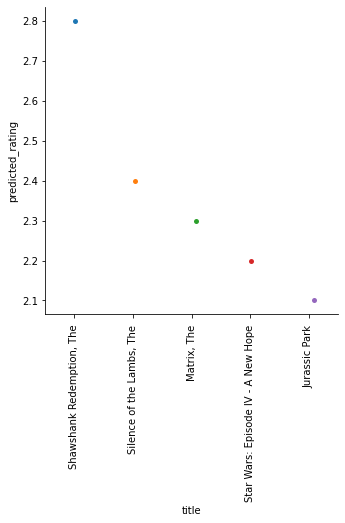

In [420]:
# checking for the ratings of recommended movies
sns.catplot(x="title", y="predicted_rating", data = special_picks_for_you(100, 5))
plt.xticks(rotation = 90)

In [282]:
import pickle

In [283]:
pickle.dump(movies.to_dict(), open('movies_dict.pkl', 'wb'))

In [284]:
# creating title array for the recommender app
movies['title'].values

array(['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)',
       ..., 'Flint (2017)', 'Bungo Stray Dogs: Dead Apple (2018)',
       'Andrew Dice Clay: Dice Rules (1991)'], dtype=object)

In [285]:
pickle.dump(rating_final, open('rating_final.pkl', 'wb'))

In [286]:
pickle.dump(users, open('users.pkl', 'wb'))

In [287]:
rating_final1

,movieId,rating_avg,overall_rating,rating_count,title,genres,userId,rating,timestamp
0,356,4.164134,4.0,329,Forrest Gump (1994),Comedy|Drama|Romance|War,1,4.0,964980962
1,356,4.164134,4.0,329,Forrest Gump (1994),Comedy|Drama|Romance|War,6,5.0,845553200
2,356,4.164134,4.0,329,Forrest Gump (1994),Comedy|Drama|Romance|War,7,5.0,1106635915
3,356,4.164134,4.0,329,Forrest Gump (1994),Comedy|Drama|Romance|War,8,3.0,839463527
4,356,4.164134,4.0,329,Forrest Gump (1994),Comedy|Drama|Romance|War,10,3.5,1455301685
...,...,...,...,...,...,...,...,...,...
20183,44191,3.885000,4.0,100,V for Vendetta (2006),Action|Sci-Fi|Thriller|IMAX,599,3.5,1498542540
20184,44191,3.885000,4.0,100,V for Vendetta (2006),Action|Sci-Fi|Thriller|IMAX,600,0.5,1237760968
20185,44191,3.885000,4.0,100,V for Vendetta (2006),Action|Sci-Fi|Thriller|IMAX,601,4.0,1521467758
20186,44191,3.885000,4.0,100,V for Vendetta (2006),Action|Sci-Fi|Thriller|IMAX,608,4.0,1147964276


In [433]:
user_Id = users["userId"]
user_Id  = user_Id.drop_duplicates()
user_Id = user_Id.values

In [434]:
pickle.dump(user_Id, open('user_Id.pkl', 'wb'))

In [435]:
pickle.dump(movie_rating_tab, open('movie_rating_tab.pkl', 'wb'))

In [436]:
pickle.dump(rating_final1, open('rating_final1.pkl', 'wb'))

In [437]:
pickle.dump(ratings, open('ratings.pkl', 'wb'))
pickle.dump(rating_avg, open('rating_avg.pkl', 'wb'))
pickle.dump(rating_count, open('rating_count.pkl', 'wb'))

# Evaluating recommender systems

In [438]:
user_rating_tab

title,2001: A Space Odyssey (1968),Ace Ventura: Pet Detective (1994),Aladdin (1992),Alien (1979),Aliens (1986),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),Apocalypse Now (1979),...,"Truman Show, The (1998)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),Up (2009),"Usual Suspects, The (1995)",V for Vendetta (2006),WALL·E (2008),Waterworld (1995),Willy Wonka & the Chocolate Factory (1971),X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,4.0,0.0,0.0,5.0,5.0,0.0,4.0,...,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,5.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
5,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,5.0,0.0,0.0,4.0,3.5,4.5,4.5,4.0,1.0,4.5,...,4.5,4.0,0.0,0.0,4.5,0.0,4.0,0.0,0.0,0.0
607,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0
608,3.0,3.5,3.0,4.0,4.5,0.0,5.0,4.0,2.5,3.0,...,4.5,3.5,3.0,0.0,4.5,4.0,0.0,3.0,3.5,4.0


### Train - Test split

#### 1st step: Let's find out all the ratings positions in this dataset not 0

This will help us create the train and the test set (the `0` ratings cannot go to the test set, this is why we have to identify the non-zero ratings)

We will replace two random movies that user `1` has rated by zero. We will then predict the scores with our recommender:

In [444]:
np.nonzero(np.array(user_rating_tab))

(array([  0,   0,   0, ..., 596, 596, 596], dtype=int64),
 array([  3,   6,   7, ..., 133, 134, 137], dtype=int64))

In [445]:
ratings_pos = pd.DataFrame(
    np.nonzero(np.array(user_rating_tab)), # find out all the positions different than 0
).T
ratings_pos.columns = ["row_pos", "column_pos"]

ratings_pos.head()

,row_pos,column_pos
0,0,3
1,0,6
2,0,7
3,0,9
4,0,11


In [442]:
user_rating_tab.iloc[0:1, [3, 6, 7, 9, 11]]

title,Alien (1979),American Beauty (1999),American History X (1998),Apocalypse Now (1979),Austin Powers: International Man of Mystery (1997)
userId,,,,,
1,4.0,5.0,5.0,4.0,5.0


In [446]:
len(ratings_pos)

20188

#### 2nd step: Create the train and test

In [447]:
# split with train and test
from sklearn.model_selection import train_test_split
train_pos, test_pos = train_test_split(ratings_pos, 
                                       random_state=123, 
                                       test_size=.1)

### Train Values

In [448]:
train_pos.sort_values(["row_pos", "column_pos"]).head(3)

,row_pos,column_pos
0,0,3
1,0,6
2,0,7


### Test Values

In [449]:
test_pos.sort_values(["row_pos", "column_pos"]).head(3)

,row_pos,column_pos
19,0,53
24,0,63
74,3,44


In [450]:
pd.DataFrame(np.zeros(user_rating_tab.shape))

,0,1,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [451]:
train_pos.values

array([[137, 100],
       [508,  81],
       [240, 100],
       ...,
       [542,  19],
       [466,  55],
       [594,  20]], dtype=int64)

In [452]:
# create an empty arrays full of 0, with the same shape as the users-items data
train = np.zeros(user_rating_tab.shape)

# fill the set with the ratings based on the train positions
for pos in train_pos.values: 
    index = pos[0]
    col = pos[1]
    train[index, col] = user_rating_tab.iloc[index, col]

# convert arrays to dataframe
train = pd.DataFrame(train, 
                     columns=user_rating_tab.columns, 
                     index=user_rating_tab.index)

train.head()

title,2001: A Space Odyssey (1968),Ace Ventura: Pet Detective (1994),Aladdin (1992),Alien (1979),Aliens (1986),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),Apocalypse Now (1979),...,"Truman Show, The (1998)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),Up (2009),"Usual Suspects, The (1995)",V for Vendetta (2006),WALL·E (2008),Waterworld (1995),Willy Wonka & the Chocolate Factory (1971),X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,4.0,0.0,0.0,5.0,5.0,0.0,4.0,...,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,5.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0


In [453]:
train.iloc[0:1, [3, 6, 7, 9, 11]]

title,Alien (1979),American Beauty (1999),American History X (1998),Apocalypse Now (1979),Austin Powers: International Man of Mystery (1997)
userId,,,,,
1,4.0,5.0,5.0,4.0,5.0


### for the test set

In [454]:
test = np.zeros(user_rating_tab.shape)

for pos in test_pos.values: 
    index = pos[0]
    col = pos[1]
    test[index, col] = user_rating_tab.iloc[index, col]
    
test = pd.DataFrame(test, 
                    columns=user_rating_tab.columns, 
                    index=user_rating_tab.index)

In [455]:
test.iloc[0:1, [3, 6, 7, 9, 11]]

title,Alien (1979),American Beauty (1999),American History X (1998),Apocalypse Now (1979),Austin Powers: International Man of Mystery (1997)
userId,,,,,
1,0.0,0.0,0.0,0.0,0.0


We can build a compact dataframe to store the positions of all the places in the test set and their true rating:

In [456]:
true_test_ratings = []

for row in test_pos.iterrows():
    true_test_ratings.append(user_rating_tab.iloc[int(row[1][0]), int(row[1][1])])

In [457]:
test_pos = test_pos.assign(true_rating = true_test_ratings)

In [458]:
test_pos.head()

,row_pos,column_pos,true_rating
13292,399,71,5.0
16787,502,78,4.0
4761,139,39,3.0
18863,574,29,5.0
7578,225,65,3.5


#### 3rd step: build the similarity matrix for the train set

In [459]:
# train the model
train_similarity = pd.DataFrame(cosine_similarity(train), 
                                columns=train.index, 
                                index=train.index)
train_similarity.head(3)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.056706,0.151031,0.464834,0.319951,0.327458,0.371245,0.261109,0.163004,0.051437,...,0.259397,0.381695,0.612097,0.170217,0.34118,0.574272,0.527127,0.571496,0.204899,0.531370
2,0.056706,1.000000,0.000000,0.020635,0.046363,0.053369,0.036916,0.064739,0.000000,0.132112,...,0.308690,0.053914,0.047256,0.000000,0.00000,0.149028,0.051619,0.116769,0.077178,0.227926
3,0.151031,0.000000,1.000000,0.000000,0.274411,0.113715,0.000000,0.229900,0.000000,0.000000,...,0.176336,0.191460,0.094398,0.000000,0.00000,0.135123,0.183309,0.109364,0.000000,0.082313


#### 4th step: Predict rating for a single place of the test set

We will look at the restaurant `title=xXx (2002)` and user `1` - the data value in position ``

We use only the ratings on the train set, and the similarity matrix computed only from the train set:

In [461]:
results = (
    pd.DataFrame({
        'ratings': train.loc[:,"Apocalypse Now (1979)"], 
        'similarities' : train_similarity.loc[1,:].tolist()
    })
)
results.head()

,ratings,similarities
userId,,
1,4.0,1.000000
2,0.0,0.056706
3,0.0,0.151031
4,0.0,0.464834
5,0.0,0.319951


In [462]:
results = results.assign(weights = results.similarities / (sum(results.similarities)-1))

In [463]:
results = results.assign(weighted_ratings = results.ratings * results.weights)

In [464]:
pred_rating = results.weighted_ratings.sum()
pred_rating

1.0830635500443773

In [466]:
true_rating = user_rating_tab.loc[1, "Apocalypse Now (1979)"]
true_rating

4.0

In [467]:
error = true_rating - pred_rating
error

2.9169364499556227

## Computing all recommendations for the test set
We will build a function that computes the ratings for a single user and a single movie

In [468]:
def recommender(index_pos, column_pos): 
    # build a df with the ratings for one place (column_name) and
    # the similarities to one user (index_name)
    results = (
      pd.DataFrame({
          'ratings': train.iloc[:,column_pos], 
          'similarities' : train_similarity.iloc[index_pos,:].tolist()
      })
    )
    
    # compute the weights
    results = results.assign(weights = results.similarities / (sum(results.similarities) -1))
    
    # compute the weighted ratings
    results = results.assign(weighted_ratings = results.ratings * results.weights)
    
    # return rating prediction for one user and one movie
    return results.weighted_ratings.sum()

In [470]:
recommender(0, 11)

0.8712558925761383

In [471]:
test_pos.sort_values(["row_pos", "column_pos"])

,row_pos,column_pos,true_rating
19,0,53,5.0
24,0,63,4.0
74,3,44,5.0
80,3,63,4.0
81,3,65,4.0
...,...,...,...
20107,596,25,3.5
20124,596,52,4.5
20126,596,55,5.0
20140,596,75,5.0


Let's store the recommendations on a list:

In [472]:
recs_test = []

for row in test_pos.iterrows():
    recs_test.append(
        recommender(
            index_pos = int(row[1][0]), 
            column_pos = int(row[1][1])
        )
    )

In [473]:
recs_test

[1.28321523998412,
 1.26454618241402,
 1.4048659185644312,
 0.7983478845531956,
 0.9356842598754646,
 0.9180384680963433,
 1.1878281780846822,
 1.6539087710594178,
 0.9965548502952561,
 1.5247409285315359,
 1.0549329264434026,
 1.2931266013659912,
 1.5155495110505801,
 1.39838995013903,
 0.9572299958517505,
 1.158799759889078,
 1.0132222982888142,
 0.6603048639446859,
 0.7821621009172327,
 1.479916130466779,
 1.6004951174976272,
 1.641815577588572,
 1.4281861581931254,
 1.5798480164426847,
 0.9518171372232405,
 1.2981347703002117,
 1.3638194483270933,
 0.8534682531282715,
 0.9728649988916152,
 2.4536322476945482,
 1.1420740375091447,
 1.0776349285460127,
 1.6090489520151934,
 1.2894856647809552,
 1.1589802696797218,
 1.744058494240904,
 0.6874039406908736,
 1.9213977353593459,
 1.4255030439164975,
 1.1220683512968133,
 0.7463985543555017,
 1.3042912595817644,
 0.9316750019694802,
 1.343027153466195,
 2.0613584202509965,
 0.9546443630142301,
 0.9981379349215145,
 1.147635459570164,
 1.1

In [474]:
test_pos = test_pos.assign(pred_rating = recs_test)

In [475]:
test_pos.head()

,row_pos,column_pos,true_rating,pred_rating
13292,399,71,5.0,1.283215
16787,502,78,4.0,1.264546
4761,139,39,3.0,1.404866
18863,574,29,5.0,0.798348
7578,225,65,3.5,0.935684


## Performance metrics

In [476]:
from sklearn.metrics import mean_absolute_error

In [477]:
mean_absolute_error(test_pos.true_rating, test_pos.pred_rating)

2.5798570867813444

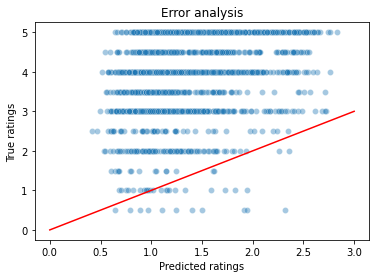

In [478]:
import matplotlib.pyplot as plt
import seaborn as sns

predictions = test_pos.pred_rating
true_values = test_pos.true_rating

plt.title('Error analysis')
plt.xlabel('Predicted ratings')
plt.ylabel('True ratings')
sns.lineplot(x=[0,3], y=[0,3], color='red')
sns.scatterplot(x=predictions, y=true_values, alpha=0.4)
plt.show()

In [479]:
test_pos.loc[test_pos.true_rating==2,:]["pred_rating"].mean()

1.1805666068331961

In [480]:
test_pos.loc[test_pos.true_rating==1,:]["pred_rating"].mean()

1.1201689614122066

In [481]:
from sklearn.metrics import r2_score

r2_score(test_pos.true_rating, test_pos.pred_rating)

-7.476261492296066